# Analysis of Yelp Data


The Yelp dataset is a collection of user-generated reviews and associated data for businesses in various cities. The data includes information such as the business name, category, location, and rating, as well as the user ID and review text for each review. This data can be used to analyze patterns and trends in consumer behavior, business performance, and geographic locations. Additionally, the dataset provides an opportunity to explore the relationships between different variables, such as ratings, reviews, and business categories. This data can be leveraged to gain insights and make informed decisions in a variety of industries, including marketing, business management, and public policy.

Description of the variables of the data used here.

* __business_id__ - A unique identifier for each business in the dataset
* __business_categories__ - A list of categories associated with the business
* __business_city__ - The city where the business is located.
* __user_id__ - A unique identifier for each user who has written a review.
* __text__ - The text of the review.
* __stars__ - The user's rating towards the business
* __useful__ - The number of times the review was voted as useful.
* __date__ - The date the review was posted.

 # Q1. Check and remove missing data
 
### Q1.1 Write a Python code snippet that checks for missing values in each column of the dataset. If any, only display the names of the columns with missing values and their corresponding number of missing values. Print the length of the data before removing the missing data.

Note: Only output the number of missing values for the columns having at least one missing value!

In [4]:
import pandas as pd

In [5]:
data = pd.read_csv('Yelp_portfolio1_Input.csv')
data.head()

,business_categories,business_city,business_id,date,stars,text,useful,user_id
0,Breakfast & Brunch; Restaurants,Phoenix,9yKzy9PApeiPPOUJEtnvkg,26/1/2011,5,My wife took me here on my birthday for breakf...,5,rLtl8ZkDX5vH5nAx9C3q5Q
1,Italian; Pizza; Restaurants,Phoenix,ZRJwVLyzEJq1VAihDhYiow,27/7/2011,5,I have no idea why some people give bad review...,0,0a2KyEL0d3Yb1V6aivbIuQ
2,Middle Eastern; Restaurants,Tempe,6oRAC4uyJCsJl1X0WZpVSA,14/6/2012,4,love the gyro plate. Rice is so good and I als...,1,0hT2KtfLiobPvh6cDC8JQg
3,Active Life; Dog Parks; Parks,Scottsdale,_1QQZuf4zZOyFCvXc0o6Vg,27/5/2010,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",2,uZetl9T0NcROGOyFfughhg
4,Tires; Automotive,Mesa,6ozycU1RpktNG2-1BroVtw,5/1/2012,5,General Manager Scott Petello is a good egg!!!...,0,vYmM4KTsC8ZfQBg-j5MWkw


In [21]:
for column in data.columns:
    print("Column '{}': {}".format(column, len(data[column])))

Column 'business_categories': 229907
Column 'business_city': 229907
Column 'business_id': 229907
Column 'date': 229907
Column 'stars': 229907
Column 'text': 229907
Column 'useful': 229907
Column 'user_id': 229907


In [18]:
missing_values = data.isnull().sum()

# Search columns for null values
cols_with_missing = missing_values[missing_values > 0].index.tolist()

# Print the name of column which contains nulls and how many there are
if len(cols_with_missing) > 0:
    for col in cols_with_missing:
        print("Column '{}' has {} missing values.".format(col, missing_values[col]))

Column 'business_categories' has 777 missing values.
Column 'text' has 6 missing values.


In [16]:
missing_values = ['#NAME?', '#VALUE!']

# Check columns for '#Name?' and '#Value!'
cols_with_missing = []
for col in data.columns:
    if data[col].isin(missing_values).sum() > 0:
        cols_with_missing.append(col)

# Print the name of  columns with those values and how many of them there are
if len(cols_with_missing) > 0:
    for col in cols_with_missing:
        missing_count = data[col].isin(missing_values).sum()
        print("Column '{}' has {} missing values.".format(col, missing_count))


Column 'business_id' has 3727 missing values.
Column 'text' has 14 missing values.
Column 'user_id' has 2693 missing values.


### Q1.2 Remove any row that contains at least one missing value, and output the length of the resulting cleaned dataset; After that, remove any row that contain invalid value with either "#NAME?" or "#VALUE!" in the `business_id` and `user_id` columns, and output the length of the resulting cleaned dataset.

In [24]:
valid_data = data.dropna(subset=['business_categories', 'business_city', 'business_id', 'date', 'stars', 'text', 'useful', 'user_id'], how='any')
print("Length of the clean dataset: {}".format(len(valid_data)))

Length of the clean dataset: 229124


In [25]:
clean_data = data.dropna(subset=['business_categories', 'business_city', 'business_id', 'date', 'stars', 'text', 'useful', 'user_id'], how='any')

# Remove invalid values from selected columns
clean_data = clean_data[(clean_data['business_id'] != "#NAME?") & (clean_data['business_id'] != "#VALUE!") & (clean_data['user_id'] != "#NAME?") & (clean_data['user_id'] != "#VALUE!")]

# Print the length of the cleaned dataset
print("Length of the cleaned dataset: {}".format(len(clean_data)))

Length of the cleaned dataset: 222759


# Q2. Random Subset Selection of Yelp Businesses by City

Selecting a random subset of cities from the Yelp business dataset and extracting all the rows corresponding to businesses located in those cities can be useful for various purposes. For example, it can be used to 
perform exploratory data analysis on a smaller subset of the dataset, which can be more manageable and faster to process than the entire dataset. Suppose you want to select a random subset of 10 cities from the dataset and extract all the rows that correspond to businesses located in those cities. At last, print the length of the resulting sample data. Write Python code that accomplishes this task.

Note: Use the $random.sample()$ function to select 10 random cities from the list of unique cities. Set the random seed to 42 before selecting the cities!!!

In [60]:
# Set the random seed to 42
random.seed(42)

# Get a list of unique cities in the dataset
unique_cities = data['business_city'].unique()

# Select 10 random cities from the list of unique cities
random_cities = random.sample(list(unique_cities), 10)
print("Random cities selected: ", random_cities)


Random cities selected:  ['Ahwatukee', 'Tolleson', 'Tempe', 'Saguaro Lake', 'Cave Creek', 'Goodyear', 'Avondale', 'Surprise', 'Grand Junction', 'Glendale']


In [64]:
# list of cities to extract
cities = ['Ahwatukee', 'Tolleson', 'Tempe', 'Saguaro Lake', 'Cave Creek', 'Goodyear', 'Avondale', 'Surprise', 'Grand Junction', 'Glendale']

# extract rows that contain the specified cities
subset = data[data['business_city'].isin(cities)]

# print the length of the resulting data
print(len(subset))

41251


# Q3. Descriptive statistics on the data output from Q2
### Q3.1 Compute summary statistics for the `stars` column of the sample data
Note: the resulting output includes the count, mean, standard deviation, minimum, maximum values of the column.

In [87]:
# Select stars column
stars = df['stars']

# Print summary statistics
print("Count:", stars.count())
print("Mean:", stars.mean())
print("Standard Deviation:", stars.std())
print("Minimum:", stars.min())
print("Maximum:", stars.max())

Count: 229907
Mean: 3.766723066283323
Standard Deviation: 1.2170100856368637
Minimum: 1
Maximum: 5


### Q3.2 For each city in the dataframe, how many unique businesses are there?

Note: the resulting dataframe has two columns: `business_city` and `count`. Compute summary statistics (similar as Q 3.1) for the `count` column.

In [72]:
business_count = df['business_city'].value_counts().reset_index()
business_count.columns = ['business_city', 'count']
#Display all rows
pd.set_option('display.max_rows', None)
print(business_count)

       business_city  count
0            Phoenix  96569
1         Scottsdale  51571
2              Tempe  28355
3           Chandler  14900
4               Mesa  10719
5           Glendale   7708
6            Gilbert   6235
7             Peoria   2802
8           Surprise   1453
9           Avondale   1382
10   Paradise Valley   1221
11          Goodyear   1211
12        Cave Creek    816
13       Queen Creek    715
14    Fountain Hills    418
15            Anthem    372
16       Casa Grande    309
17          Carefree    283
18   Litchfield Park    282
19   Apache Junction    281
20           Buckeye    218
21          Sun City    198
22          Maricopa    183
23          Tolleson    182
24        Wickenburg    179
25            Laveen    134
26         Ahwatukee    134
27     Fort McDowell    108
28         Gila Bend     90
29       Gold Canyon     81
30         Guadalupe     69
31          Florence     67
32         El Mirage     56
33  North Scottsdale     54
34     Sun City West

### Q3.3 For each business category and business ID combination in the dataframe, how many unique users have rated the business?

Note: the resulting dataframe has three columns: `business_categories`, `business_id`, and `count`. Compute summary statistics (similar as Q 3.1) for the `count` column.

In [74]:
counts = df.groupby(['business_categories', 'business_id'])['user_id'].nunique().reset_index()
counts.columns = ['business_categories', 'business_id', 'count']
print(counts)

                                     business_categories  \
0      Accessories; Fashion; Shopping; Cosmetics & Be...   
1                     Accountants; Professional Services   
2                     Accountants; Professional Services   
3                     Accountants; Professional Services   
4                     Accountants; Professional Services   
5      Accountants; Professional Services; Financial ...   
6      Accountants; Professional Services; Tax Servic...   
7      Accountants; Professional Services; Tax Servic...   
8      Accountants; Professional Services; Tax Servic...   
9                                            Active Life   
10                                           Active Life   
11                                           Active Life   
12                                           Active Life   
13                                           Active Life   
14                                           Active Life   
15                                      

# Q4. Plotting and Analysis

Explore the distribution of each variable, or the correlation between the `business_city`, `useful`,`business_categories` or `other variables` and the `stars` column in both the cleaned dataset from Q1 and the sampled dataset from Q2. For instance, does some cities tend to provide higher stars than others? Hint: you may use the boxplot function to plot figures for comparison (___Challenge___).
    
You may need to select the most suitable graphic forms for ease of presentation. Most importantly, for each figure or subfigure, please summarise ___what each plot shows___ (i.e. observations and explanations). Finally, you may need to provide an overall summary of the Yelp data.

Analysis and observation are open, and require you to think critically and analyze data to develop your own insights and conclusions. It's important for you to analyze the data, identify patterns, draw your own conclusions, and communicate your findings. This fosters critical thinking skills, ownership of learning, and a deeper understanding of the data.

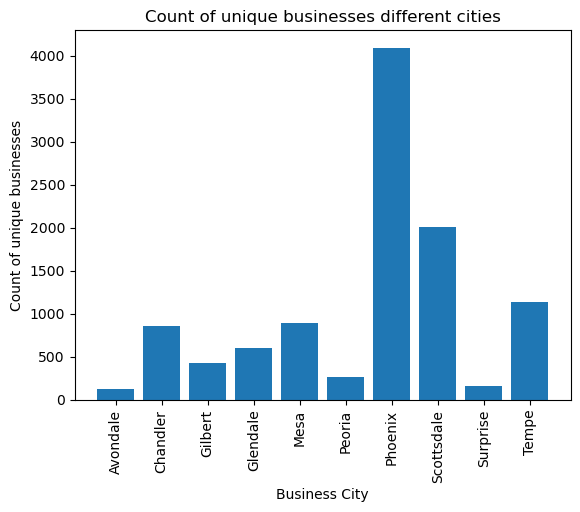

In [83]:
import matplotlib.pyplot as plt

#bar chart
plt.bar(random_cities['business_city'], random_cities['count'])

# Set x-axis label put space between names
plt.xlabel('Business City')
plt.xticks(rotation=90)

# Set y-axis label
plt.ylabel('Count of unique businesses')

# Set title
plt.title('Count of unique businesses different cities')

plt.show()


In [86]:
#The count of unique businesse in each city shows the correlation between cities with a large population having a higher number of unique businesses than those without.